In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('tweet.csv')
data.head()

,Tweets,created_at
0,الهواري: اللقاح منع تصاعد الحالة الوبائية وموج...,2021/04
1,صحة إربد: 100 ألف شخص تلقوا اللقاح وإقبال متزا...,2021/04
2,@Sarsak24 @khaberni انا وجهة نظري ، الحل الافض...,2021/04
3,@alialasmar89 @khaberni لا تخاطر يا اخ خذ اللق...,2021/04
4,RT @Dr_abdoty: ليش ناخذ اللقاح؟\nشنو الهدف منه...,2021/04


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweets      2442 non-null   object
 1   created_at  2442 non-null   object
dtypes: object(2)
memory usage: 38.3+ KB


## Text tokinization

In [5]:
import nltk
from nltk import sent_tokenize,word_tokenize
from nltk.probability import FreqDist
nltk.download("stopwords")
from collections import Counter


[nltk_data] Downloading package stopwords to C:\Users\Computergy
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Define a list of arabic and english punctiations that we want to get rid of in our text
import string
import re 

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
arb_stopwords = set(nltk.corpus.stopwords.words("arabic")).union({'و','الله','او','من','الى','عن','على','في','ال','ا'})

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text= re.sub("[إأآا]", "ا", text)
    text= re.sub("الردن",'الاردن' ,text)
    #remove stop words and unkwon characters
    filtered = []
    for w in text.split():
        w = re.sub(r"[0-9a-zA-Z]", "", w,flags=re.I)
        if w not in arb_stopwords:
            filtered.append(w)
    text = ' '.join(word for word in filtered)

    return text
  
data['Tweets'] = data['Tweets'].apply(preprocess)
print(data.head(5))

                                              Tweets created_at
0  الهواري اللقاح منع تصاعد الحاله الوباءيه وموجاتها    2021/04
1  صحه ربد لف شخص تلقوا اللقاح وقبال متزايد التطع...    2021/04
2  انا وجهه نظري الحل الافضل اللقاح الكل ينصاب وم...    2021/04
3  تخاطر اخ خذ اللقاح يخلصنا زياده عدد الحالات وا...    2021/04
4                          ليش ناخذ اللقاح شنو الهدف    2021/04


In [54]:
Tweets = data['Tweets'].values.tolist()

In [55]:
tokenized = []
for i in Tweets :
    i = word_tokenize(i)
    for b in i :
        tokenized.append(b)

In [56]:
print('tokeniz=',len(tokenized ))
print('type=',len(set(tokenized) ))

tokeniz= 26524
type= 8112


In [57]:
from arabic_reshaper import reshape      
from bidi.algorithm import get_display   

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(tokenized )
counts = ((rtl(k),v) for k, v in COUNTS.most_common(15))

In [58]:
COUNTS.most_common(20)

[('لقاح', 806),
 ('كورونا', 631),
 ('مطعوم', 503),
 ('الاردن', 341),
 ('عاجل', 267),
 ('اللقاح', 253),
 ('المطعوم', 239),
 ('الصحه', 138),
 ('تلقوا', 131),
 ('الجرعه', 128),
 ('جرعه', 122),
 ('شخص', 103),
 ('تلقي', 102),
 ('مليون', 98),
 ('لف', 88),
 ('الولى', 88),
 ('فايزر', 86),
 ('سترازينيكا', 85),
 ('السوسنه', 84),
 ('جونسون', 81)]

In [59]:
word=[]
count=[]
for i in counts:
    word.append(i[0])
    count.append(i[1])


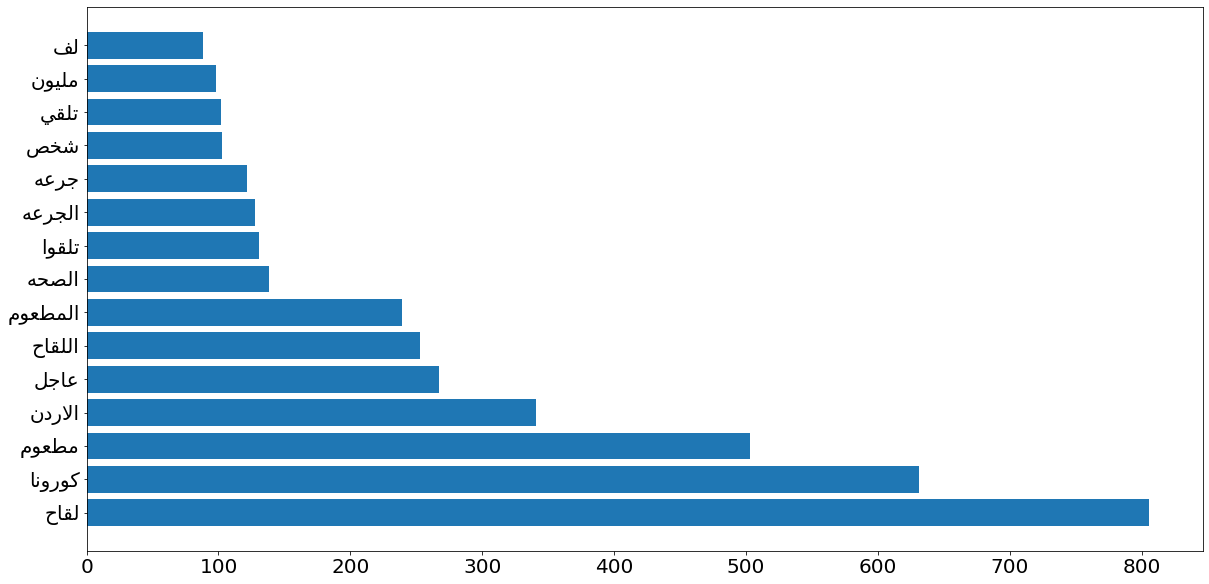

In [60]:
plt.barh(word, count)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig('most common words.png')
plt.show()

# wordcloud

In [44]:
!pip install wordcloud
print('Ok!')

In [22]:
!pip install arabic_reshaper
print('Ok!')

Ok!


In [58]:
import numpy as np
from PIL import Image
Jordan = np.array(Image.open('jo.png'))

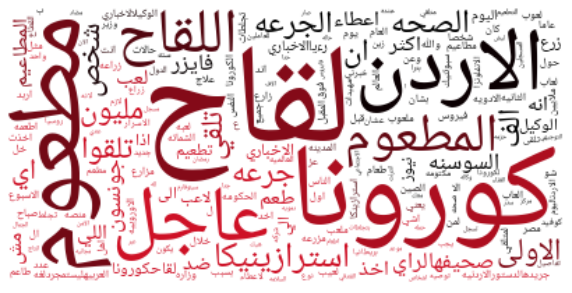

In [63]:
from wordcloud import WordCloud          
         
# -- Arabic text dependencies
from arabic_reshaper import reshape      
from bidi.algorithm import get_display   

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(tokenized )
counts = {rtl(k):v for k, v in COUNTS.most_common(5000)}

font_file = 'NotoNaskhArabicUI-Regular.ttf' # download from: https://www.google.com/get/noto

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

# Font color
image_colors = ImageColorGenerator(Jordan)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
#plt.imshow(wordcloud)#, interpolation="bilinear")

plt.axis("off")
plt.savefig('WordCloud.png')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()


_____________________________________________________________________________________

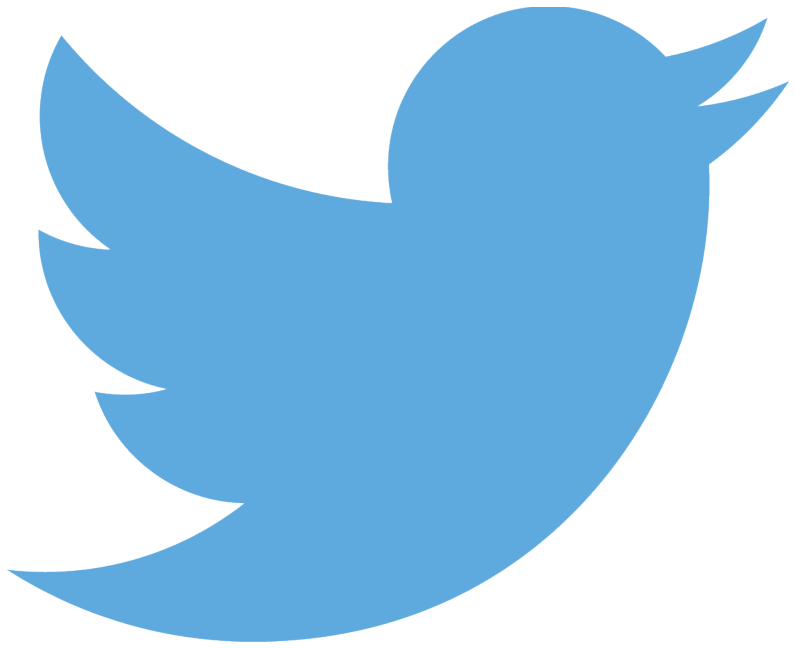

In [57]:
Twitter = np.array(Image.open('Twitter_logo_blue.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(Twitter, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from collections import Counter

from wordcloud import WordCloud,ImageColorGenerator       
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape    
from bidi.algorithm import get_display  

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(tokenized)
counts = {rtl(k):v for k, v in COUNTS.most_common(4000)}



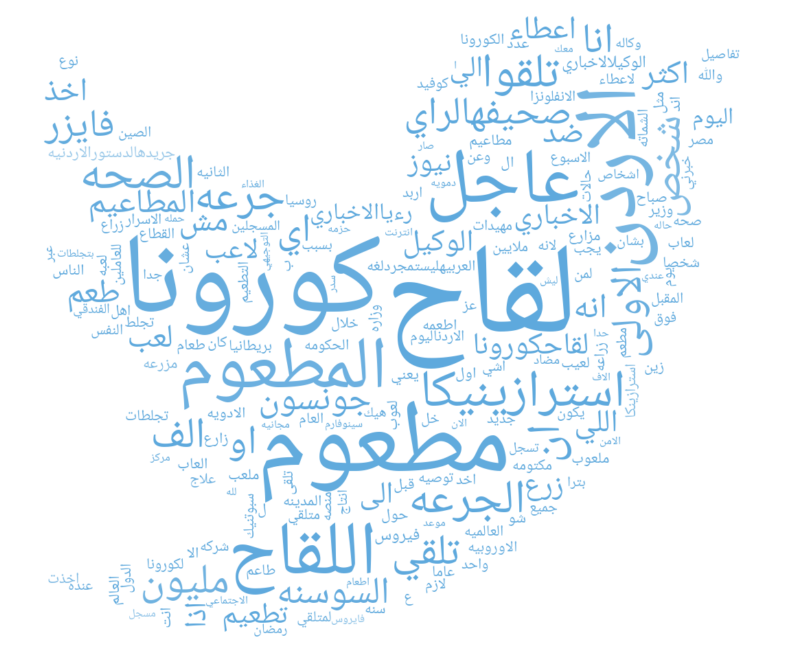

In [26]:
font_file = 'NotoNaskhArabicUI-Regular.ttf' # download from: https://www.google.com/get/noto

# instantiate a word cloud object
wordcloud = WordCloud(font_path=font_file, background_color="white", mask = Twitter )

# generate the word cloud
wordcloud.generate_from_frequencies(counts)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

image_colors = ImageColorGenerator(Twitter)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloud2.png')
plt.show()
